In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
os.listdir('../data')
assert 'out_breed.csv' in os.listdir('../data') # this assert breaks if the data is configured uncorrectly

In [4]:
breeds = pd.read_csv('../data/out_breed.csv')
colors = pd.read_csv('../data/out_color.csv')
states = pd.read_csv('../data/out_state.csv')
train  = pd.read_csv('../data/out_train.csv')
test   = pd.read_csv('../data/out_test.csv')
sub    = pd.read_csv('../data/out_submission.csv')

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each
    variable in ``data`` will by shared in the y-axis across a single row and
    in the x-axis across a single column. The diagonal Axes are treated
    differently, drawing a plot to show the univariate distribution of the data
    for the variable in that column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly if you need more flexibility.
    

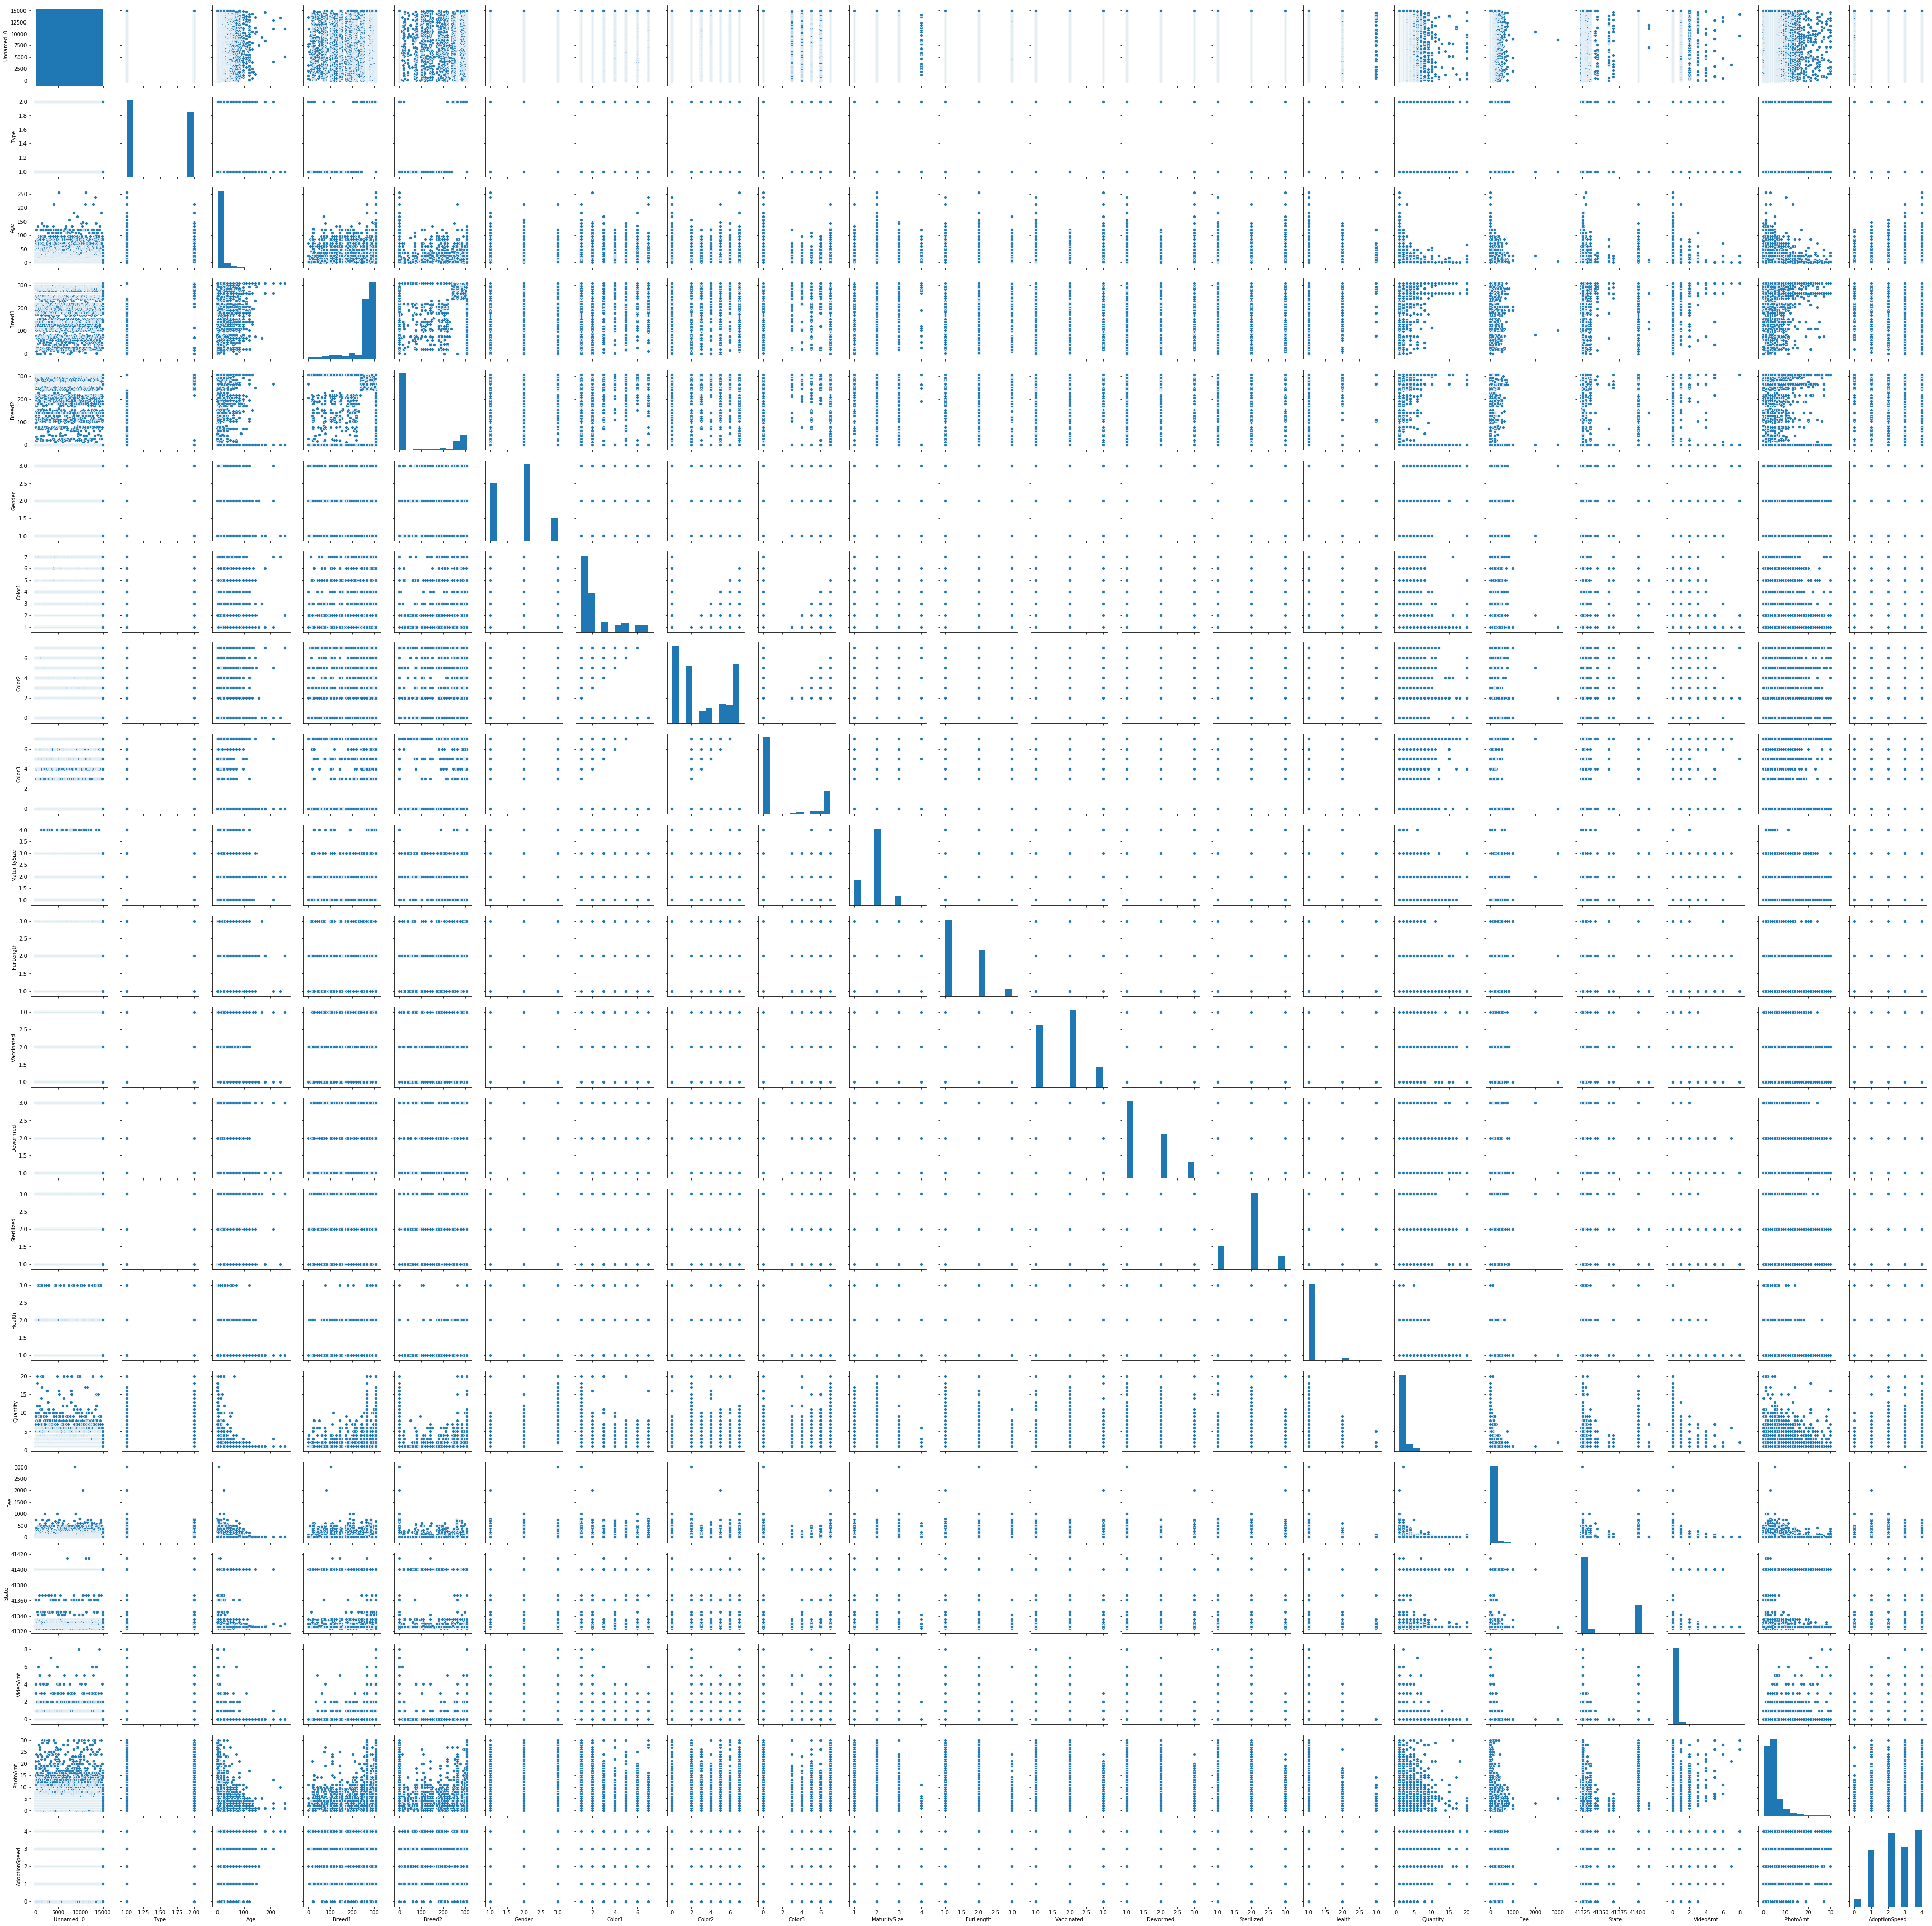

In [12]:
#sns.pairplot(train) takes ~100 seconds

In [13]:
train.columns

Index(['Unnamed: 0', 'Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender',
       'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed', 'dataset_type'],
      dtype='object')

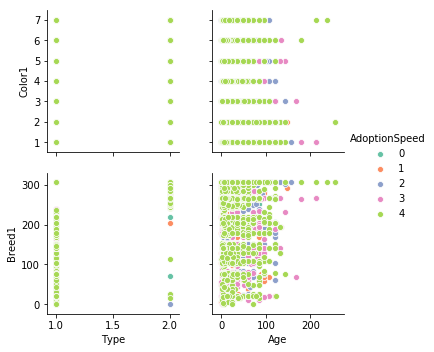

In [15]:
sns.pairplot(train,x_vars=['Type','Age'], 
             y_vars=['Color1','Breed1'],hue='AdoptionSpeed',palette='Set2')

In [ ]:
"""
g = sns.PairGrid(df, hue = 'Species',palette='Set2')
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.regplot)
g.map_upper(sns.kdeplot)
"""

In [ ]:
"""
sns.heatmap(df.select_dtypes(include='float'))
"""

Checking if two categorical variables are independent can be done with Chi-Squared test of independence.

This is a typical Chi-Square test: if we assume that two variables are independent, then the values of the contingency table for these variables should be distributed uniformly. And then we check how far away from uniform the actual values are.

https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab



In [6]:
from scipy.stats import chisquare

In [7]:
string_cols = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"]

In [8]:
categorical_col = ["Type","Gender","Vaccinated","Dewormed","Sterilized","Breed1","Breed2","Color1","Color2","Color3","State"]

In [9]:
numerical_col = [col for col in train.columns if col not in string_cols and col not in categorical_col and col != "AdoptionSpeed"]

In [10]:
target = "AdoptionSpeed"

In [57]:
categorical_col = [col for col in categorical_col if 'Breed' not in col]

In [58]:
categorical_df = train[categorical_col + [target]]

In [59]:
categorical_df.head()

,Type,Gender,Vaccinated,Dewormed,Sterilized,Color1,Color2,Color3,State,AdoptionSpeed
0,2,1,2,2,2,1,7,0,41326,2
1,2,1,3,3,3,1,2,0,41401,0
2,1,1,1,1,2,2,7,0,41326,3
3,1,2,1,1,2,1,2,0,41401,2
4,1,1,2,2,2,1,0,0,41326,2


In [60]:
# not clear why we need to do this step
categorical_df=categorical_df.apply(lambda x : pd.factorize(x)[0])+1

In [61]:
categorical_df.head()

,Type,Gender,Vaccinated,Dewormed,Sterilized,Color1,Color2,Color3,State,AdoptionSpeed
0,1,1,1,1,1,1,1,1,1,1
1,1,1,2,2,2,1,2,1,2,2
2,2,1,3,3,1,2,1,1,1,3
3,2,2,3,3,1,1,2,1,2,1
4,2,1,1,1,1,1,3,1,1,1


In [62]:
categorical_correlations = pd.DataFrame([chisquare(categorical_df[x].values,f_exp=categorical_df.values.T,axis=1)[0] for x in categorical_df])

In [63]:
categorical_correlations

,0,1,2,3,4,5,6,7,8,9
0,0.0,6549.166667,7307.500000,8699.000000,7812.666667,14321.111905,16487.126190,9618.616667,13152.290346,19889.883333
1,10185.0,0.000000,14133.666667,13349.333333,13962.666667,18898.919048,15455.804762,11047.666667,16715.779187,19461.666667
2,12091.5,15525.833333,0.000000,4101.500000,13482.000000,20779.095238,19493.257143,22669.800000,24163.759191,21181.633333
3,18143.5,18900.000000,10412.000000,0.000000,21813.833333,24434.500000,19502.847619,29193.016667,28907.581000,21321.766667
4,9237.5,10675.666667,6426.833333,8426.166667,0.000000,16848.914286,19517.926190,14154.500000,17335.900119,21321.833333
5,51105.5,43822.000000,42011.500000,33080.666667,49626.166667,0.000000,34994.735714,65006.566667,50154.362526,36212.550000
6,65580.0,44833.833333,57519.166667,44071.000000,70901.833333,57954.809524,0.000000,57664.983333,68850.477803,38293.216667
7,14140.0,9761.000000,16758.000000,16689.333333,15367.166667,25821.904762,18147.309524,0.000000,19413.427320,24675.716667
8,46655.0,40315.333333,50065.833333,43431.166667,53744.500000,50696.883333,39169.366667,57382.216667,0.000000,38135.516667
9,64692.5,54505.500000,57607.000000,44610.333333,72307.166667,65870.397619,39327.666667,83842.366667,71671.869555,0.000000


https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html

<Figure size 720x504 with 0 Axes>

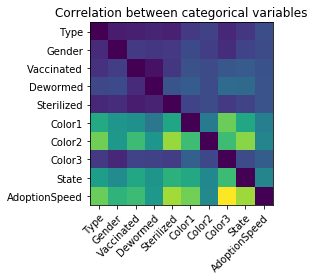

In [64]:
plt.figure(figsize=(10,7))
fig, ax = plt.subplots()
im = ax.imshow(categorical_correlations)

labels = categorical_col + [target]

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        #text = ax.text(j, i, categorical_correlations[i][j],ha="center", va="center", color="w")
        pass
        

ax.set_title("Correlation between categorical variables")
fig.tight_layout()
plt.show()

not realiable because of degree of freedom

In [44]:
numerical_df= train[numerical_col + [target]]

In [45]:
numerical_corr = numerical_df.corr()

In [48]:
for i, _ in enumerate(numerical_col + [target]): numerical_corr.iloc[i, i] = 0 #to highlight colors

In [49]:
numerical_corr

,Age,MaturitySize,FurLength,Health,Quantity,Fee,AdoptionSpeed
Age,0.000000,0.093673,0.153092,0.103215,-0.113076,0.089168,0.100510
MaturitySize,0.093673,0.000000,0.095142,-0.012957,-0.042832,0.041144,0.045653
FurLength,0.153092,0.095142,0.000000,0.028096,-0.038388,0.159693,-0.091337
Health,0.103215,-0.012957,0.028096,0.000000,-0.034567,-0.010073,0.029382
Quantity,-0.113076,-0.042832,-0.038388,-0.034567,0.000000,-0.060523,0.062931
Fee,0.089168,0.041144,0.159693,-0.010073,-0.060523,0.000000,-0.004017
AdoptionSpeed,0.100510,0.045653,-0.091337,0.029382,0.062931,-0.004017,0.000000


https://stackoverflow.com/questions/39409866/correlation-heatmap

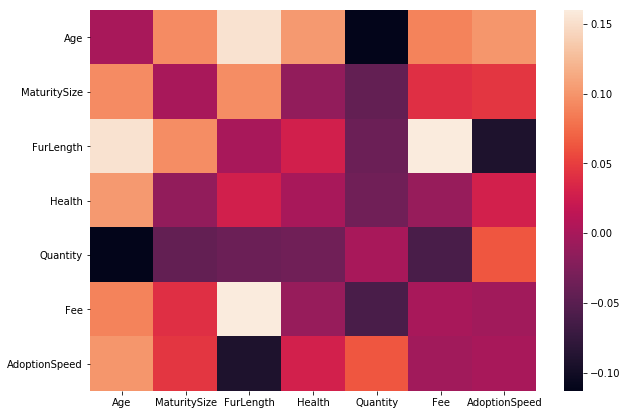

In [50]:
plt.figure(figsize=(10,7))
sns.heatmap(numerical_corr, xticklabels=numerical_corr.columns, yticklabels=numerical_corr.columns)

Some observation:
- the higher the age, the lower the quantity of pets (make sense)
- the higher the age, the higher the Fur Size (make sense)
- the higher the fur size, the higher the Fee (? interesting)

In [55]:
numerical_corr['AdoptionSpeed'].sort_values()

FurLength       -0.091337
Fee             -0.004017
AdoptionSpeed    0.000000
Health           0.029382
MaturitySize     0.045653
Quantity         0.062931
Age              0.100510
Name: AdoptionSpeed, dtype: float64

regarding to adoption speed looks like the feature interacts as follows:

in order of intensity
- the older the pet the slower the Adoption Speed
- the more the pets the slower the Adoption Speed
- the bigger the pets the slower the Adoption Speed

in order of intensity
- the shortest the pet Fur the faster the Adoption Speed

Text(0.5, 1.0, 'Correlation between age and quantity')

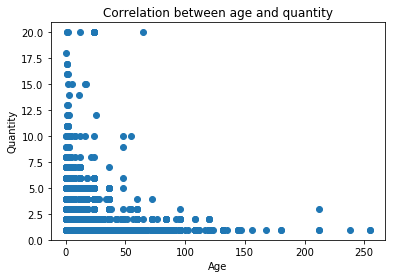

In [42]:
plt.scatter(train['Age'], train['Quantity'])
plt.xlabel("Age")
plt.ylabel("Quantity")
plt.title("Correlation between age and quantity")

Text(0.5, 1.0, 'Correlation between age and quantity')

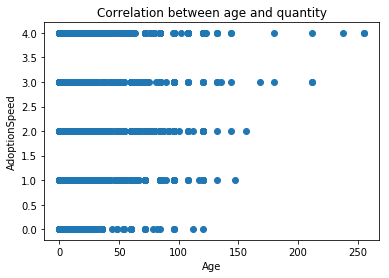

In [52]:
plt.scatter(train['Age'], train['AdoptionSpeed'])
plt.xlabel("Age")
plt.ylabel("AdoptionSpeed")
plt.title("Correlation between age and quantity")

Text(0.5, 1.0, 'Correlation between age and quantity')

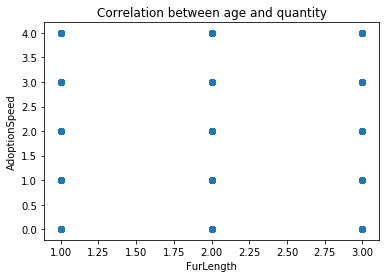

In [53]:
plt.scatter(train['FurLength'], train['AdoptionSpeed'])
plt.xlabel("FurLength")
plt.ylabel("AdoptionSpeed")
plt.title("Correlation between age and quantity")